<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
 Treadmill Buyer Profile </H1>

# Treadmill Buyer Profile


Assignment
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

Product Portfolio:

- The KP281 is an entry-level treadmill that sells for $1,500;
- The KP481 is for mid-level runners and sells for $1,750;
- The KP781 treadmill is having advanced features and it sells for $2,500.


Data Description
The company collected data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset in aerofit_treadmill_data.csv has the following features:

- Product - product purchased: KP281, KP481, or KP781
- Age - in years
- Gender - male/female
- Education - in years
- MaritalStatus - single or partnered
- Usage - the average number of times the customer plans to use the treadmill each week
- Fitness - self-rated fitness on a 1-5 scale, where 1 is the poor shape and 5 is the excellent shape
- Income - annual income in US dollars
- Miles - the average number of miles the customer expects to walk/run each week

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/neerajprasad209/Dataset/main/Treadmill-Buyer-Profile-main/aerofit_treadmill_data.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.shape

(180, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


<Axes: ylabel='Miles'>

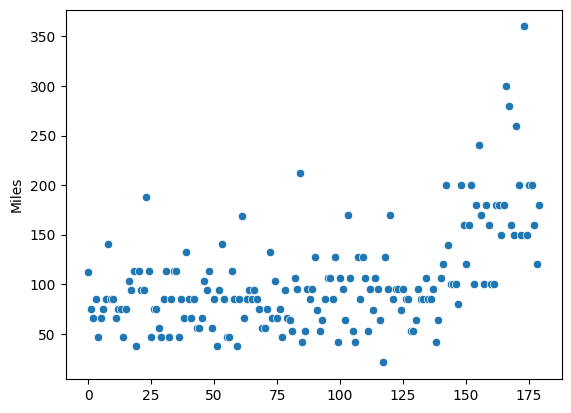

In [6]:
sns.scatterplot(data=df['Miles'])

In [7]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Seperating the Independent and Dependent Variable </H1>

In [8]:
X = df.iloc[:,:-1]

y = df.iloc[:,-1]

In [9]:
X.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income
0,KP281,18,Male,14,Single,3,4,29562
1,KP281,19,Male,15,Single,2,3,31836
2,KP281,19,Female,14,Partnered,4,3,30699
3,KP281,19,Male,12,Single,3,3,32973
4,KP281,20,Male,13,Partnered,4,2,35247


In [10]:
y.head()

0    112
1     75
2     66
3     85
4     47
Name: Miles, dtype: int64

<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Perfoming the Train Test Split </H1>

In [11]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, test_size=0.20, random_state=42)

In [12]:
Xtrain.shape, ytrain.shape

((144, 8), (144,))

In [13]:
Xtest.shape, ytest.shape

((36, 8), (36,))

In [14]:
num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(exclude='number').columns

In [15]:
num_cols

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income'], dtype='object')

In [16]:
cat_cols

Index(['Product', 'Gender', 'MaritalStatus'], dtype='object')

<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Creating the Pipeline For Numerical and Categorical Columns </H1>

In [17]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [18]:
# Numerical Pipeline -------------------------------------------------------------------------------------------------------------

num_pipe = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical Pipeline -------------------------------------------------------------------------------------------------------------

cat_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder())
])

In [19]:
preprocessor = ColumnTransformer([
    ('numerical_pipe', num_pipe, num_cols),
    ('categorical_pipe', cat_pipe, cat_cols)
])

In [20]:
preprocessor

ColumnTransformer(transformers=[('numerical_pipe',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Age', 'Education', 'Usage', 'Fitness', 'Income'], dtype='object')),
                                ('categorical_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['Product', 'Gender', 'MaritalStatus'], dtype='object'))])

In [21]:
scaled_xtrain = preprocessor.fit_transform(Xtrain)

In [36]:
final = pd.DataFrame(scaled_xtrain,columns=preprocessor.get_feature_names_out())

In [38]:
final['categorical_pipe__Product'].value_counts()

categorical_pipe__Product
0.0    62
1.0    51
2.0    31
Name: count, dtype: int64

In [23]:
scaled_xtest= preprocessor.transform(Xtest)

<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Linear Regression Model Tranning  </H1>

In [24]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [25]:
lr_model.fit(scaled_xtrain,ytrain)

LinearRegression()

In [26]:
predict = lr_model.predict(scaled_xtest)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("------------------------------------Mean Absolute Error:-------------------------------------------------")
print(f"\n{mean_absolute_error(ytest,predict)}")
print("------------------------------------Mean Squared Error:-------------------------------------------------")
print(f"\n{mean_squared_error(ytest,predict)}")
print("------------------------------------R2 Score:-------------------------------------------------")
print(f"\n{r2_score(ytest,predict)}")

------------------------------------Mean Absolute Error:-------------------------------------------------

22.1535374649497
------------------------------------Mean Squared Error:-------------------------------------------------

1513.5154957673333
------------------------------------R2 Score:-------------------------------------------------

0.5637471923999303


---------

<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Random Forest Regression Model Tranning  </H1>

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

In [29]:
rf_model.fit(scaled_xtrain,ytrain)

RandomForestRegressor()

In [30]:
rf_predict = rf_model.predict(scaled_xtest)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("------------------------------------Mean Absolute Error:-------------------------------------------------")
print(f"\n{mean_absolute_error(ytest,rf_predict)}")
print("------------------------------------Mean Squared Error:-------------------------------------------------")
print(f"\n{mean_squared_error(ytest,rf_predict)}")
print("------------------------------------R2 Score:-------------------------------------------------")
print(f"\n{r2_score(ytest,rf_predict)}")

------------------------------------Mean Absolute Error:-------------------------------------------------

24.155833333333334
------------------------------------Mean Squared Error:-------------------------------------------------

1769.3410138888887
------------------------------------R2 Score:-------------------------------------------------

0.49000853504995123


-----------

<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
L1 Regularization Model Tranning  </H1>

In [40]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()

In [41]:
lasso_reg.fit(scaled_xtrain,ytrain)

Lasso()

In [42]:
lasso_predict = lasso_reg.predict(scaled_xtest)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("------------------------------------Mean Absolute Error:-------------------------------------------------")
print(f"\n{mean_absolute_error(ytest,lasso_predict)}")
print("------------------------------------Mean Squared Error:-------------------------------------------------")
print(f"\n{mean_squared_error(ytest,lasso_predict)}")
print("------------------------------------R2 Score:-------------------------------------------------")
print(f"\n{r2_score(ytest,lasso_predict)}")

------------------------------------Mean Absolute Error:-------------------------------------------------

21.793364164063306
------------------------------------Mean Squared Error:-------------------------------------------------

1572.2701405339951
------------------------------------R2 Score:-------------------------------------------------

0.5468118661276308


<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Decision Tree Regression Model Tranning  </H1>

In [84]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=40)

In [85]:
tree.fit(scaled_xtrain,ytrain)

DecisionTreeRegressor(max_depth=40)

In [86]:
tree_pred = tree.predict(scaled_xtest)

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("------------------------------------Mean Absolute Error:-------------------------------------------------")
print(f"\n{mean_absolute_error(ytest,tree_pred)}")
print("------------------------------------Mean Squared Error:-------------------------------------------------")
print(f"\n{mean_squared_error(ytest,tree_pred)}")
print("------------------------------------R2 Score:-------------------------------------------------")
print(f"\n{r2_score(ytest,tree_pred)}")

------------------------------------Mean Absolute Error:-------------------------------------------------

24.52777777777778
------------------------------------Mean Squared Error:-------------------------------------------------

1907.0277777777778
------------------------------------R2 Score:-------------------------------------------------

0.45032196594386953
